In [1]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

# Problem 1:

In [2]:
lst = list(["A","U","G","C"]) #each letter represents Alanine, Glycine, Cysteine and Threonine.
n=100
String1 = "".join(random.choice(lst) for i in range(n))
String2 = "".join(random.choice(lst) for i in range(n))
seq1 = Seq(String1, generic_dna)
seq2 = Seq(String2, generic_dna)
print("Sequence 1=",seq1)
print("Sequence 2=",seq2)

Sequence 1= GCUACGACGCAGUUGUGAAUCUACGGAUGCUUACGGCUUGAGCAUUUCCGUAUAAACAACGGGCCACACAGUGUUAGGGUGAAAGUAAGCACAAAGAAUA
Sequence 2= CACAAAGAUAGGCGCCUGGGUGUGAAGCAUGUCAUUUAAGUCAGUGCAAACUCGAUGCGUCAAGCUAGCAGAAGAGCAGAUGCUCUGGCGACGAACAUUU


In [89]:
from Bio import SeqIO

with open("ls_orchid.fasta") as in_handle:
    record_iterator = SeqIO.parse(in_handle, "fasta")
    rec_one = next(record_iterator)
    rec_two = next(record_iterator)

seq1 = str(rec_one.seq).upper()
seq2 = str(rec_two.seq).upper()
seq2=seq2[:-13]

In [4]:
"""seq1='AGUCGGU'
seq2='AGGUCAG'
print(len(seq1))
print(len(seq2))"""

"seq1='CAUGCCAG'\nseq2='GAUACCAA'\nprint(len(seq1))\nprint(len(seq2))"

In [128]:
seq2='gucgugauca'
seq1='gccuugcccc'
seq2=seq2.upper()
seq1=seq1.upper()

## Part 1.1:
Construct two sequences with equal length of 100 nt by choosing A, U, G, C randomly

In [104]:
l1=list(seq1)
l2=list(seq2)
xlist=[]
ylist=[]
for i in range(len(l1)):        
        for j in range(len(l2)):
            if(l1[i]==l2[j]):                
                xlist.append(i)
                ylist.append(j)

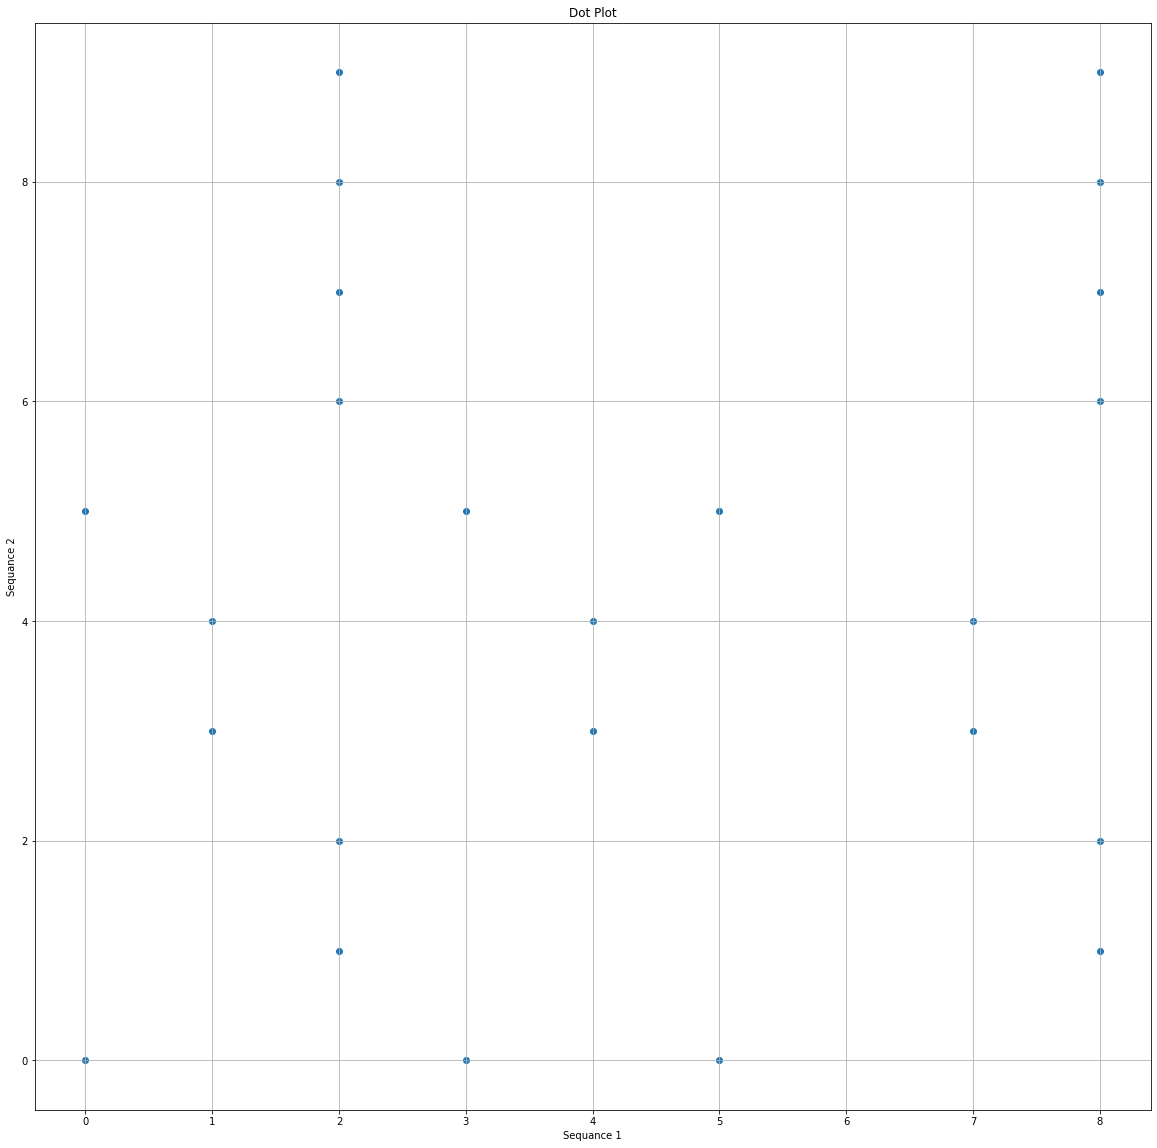

In [105]:
f = plt.figure(figsize=(n/5,n/5))
plt.scatter(xlist,ylist)

#xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
#yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))


plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.title("Dot Plot")
plt.grid()
plt.savefig('dotplot.jpg',dpi=300)
plt.show()

## Part 2:
Find the most similar region of the aligned sequences.

In [106]:
l1=list(seq1)
l2=list(seq2)
xlist=[]
ylist=[]
for i in range(len(l1)):        
            if(l1[i]==l2[i]):                
                xlist.append(i)                

In [107]:
def groupSequence(lst): 
    res = [[lst[0]]] 
    for i in range(1, len(lst)): 
        if lst[i-1]+1 == lst[i]: 
            res[-1].append(lst[i]) 
        else: 
            res.append([lst[i]]) 
    return res 

In [108]:
temp=[len(i) for i in groupSequence(xlist)]
maxpos = temp.index(max(temp))  

seq3=[seq1[i] for i in groupSequence(xlist)[maxpos]]
region="".join(seq3)

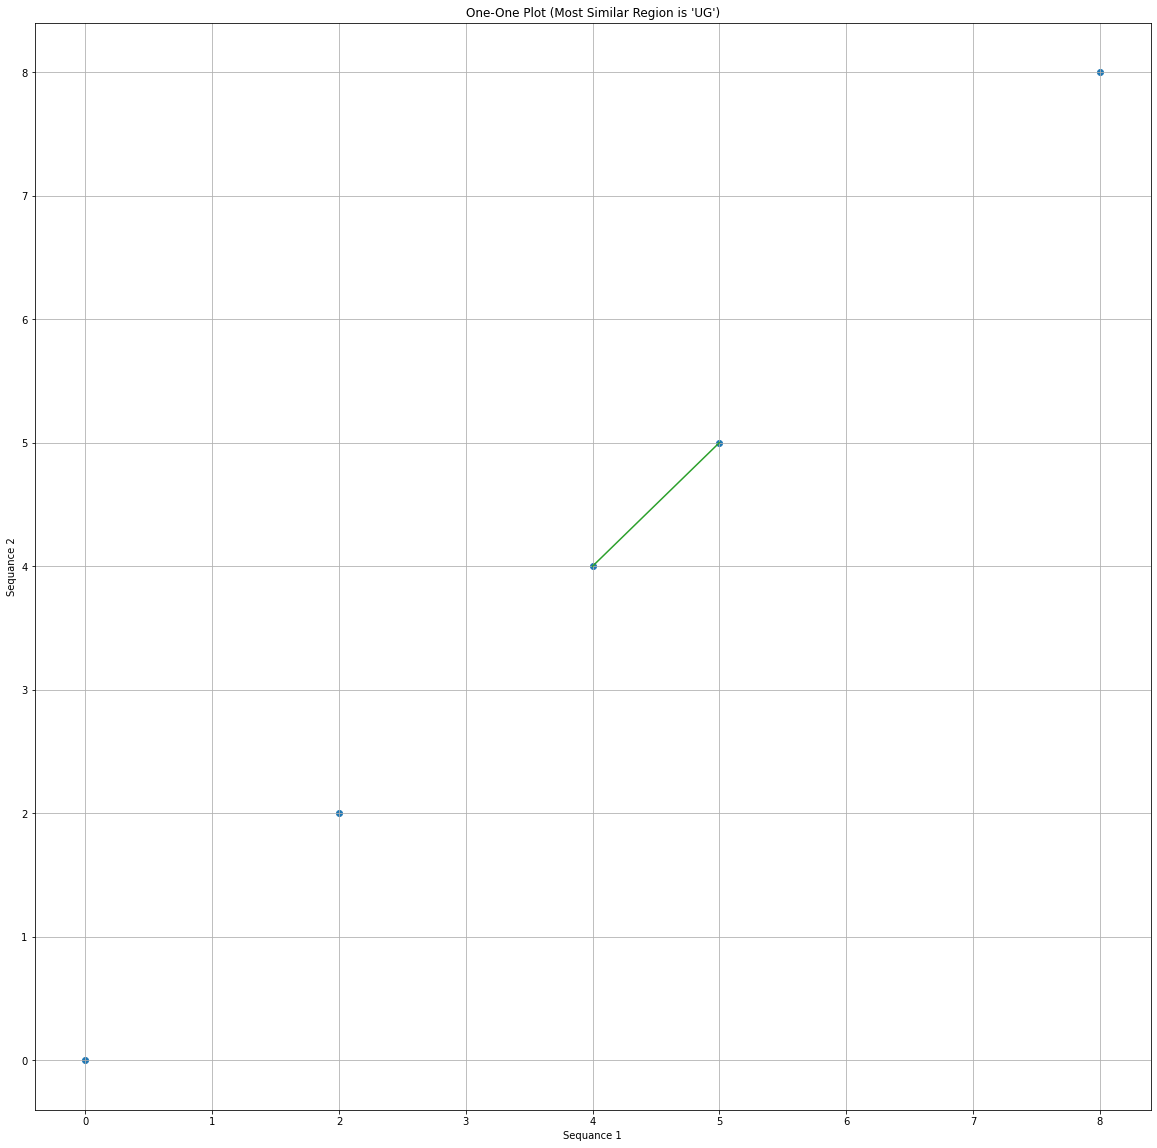

In [109]:
f = plt.figure(figsize=(n/5,n/5))
plt.scatter(xlist,xlist)

for i in groupSequence(xlist):    
    plt.plot(i,i)

#xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
#yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))


plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.title("One-One Plot (Most Similar Region is '{}')".format(region))
plt.grid()
plt.savefig('oneoneplot.jpg',dpi=300)
plt.show()

# Problem 2:

In [138]:
seq1='AGUCGGU'
seq2='AGGUCAG'
ws=3
thresold=2
l1=list(seq1)
l2=list(seq2)

seq11 = ["".join(l1[i:i+ws]) for i in range(0, len(l1)) if(len(l1[i:i+ws])==ws)] 
seq22 = ["".join(l2[i:i+ws]) for i in range(0, len(l2)) if(len(l2[i:i+ws])==ws)] 

print(seq11)
print(seq22)

['AGU', 'GUC', 'UCG', 'CGG', 'GGU']
['AGG', 'GGU', 'GUC', 'UCA', 'CAG']


In [139]:
l12=seq11[0]
l13=seq22[0]
seq111 = ["".join(l12[i:i+thresold]) for i in range(0, len(l12)) if(len(l12[i:i+thresold])==thresold)] 
seq112 = ["".join(l13[i:i+thresold]) for i in range(0, len(l13)) if(len(l12[i:i+thresold])==thresold)] 
print(seq111,seq112)

['AG', 'GU'] ['AG', 'GG']


In [140]:
x=[]
y=[]
for i in range(len(seq11)):    
    for j in range(len(seq22)):
        l1=seq11[i]
        l2=seq22[j]
        t1 = ["".join(l1[i:i+thresold]) for i in range(0, len(l1)) if(len(l1[i:i+thresold])==thresold)] 
        t2 = ["".join(l2[i:i+thresold]) for i in range(0, len(l2)) if(len(l2[i:i+thresold])==thresold)] 
        
        for k in range(len(t1)):
            if(t1[k]==t2[k]):
                #print(i,j,seq11[i],seq22[j],t1,t2,len(t2))
                x.append(seq11.index(seq11[i]))
                y.append(seq22.index(seq22[j])) 

In [141]:
x=[]
y=[]
for i in range(len(seq11)):    
    for j in range(len(seq22)):
        count=0
        
        for k in range(ws):
            #print(i,j,seq11[i],seq22[j])
            if(seq11[i][k]==seq22[j][k]):
                count+=1
        if(count>=thresold):
            #print(seq11[i],seq22[j])
            x.append(seq11.index(seq11[i]))
            y.append(seq22.index(seq22[j]))

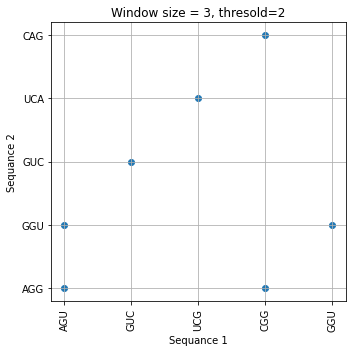

In [142]:
f = plt.figure(figsize=(5,5))
plt.scatter(x,y)

xt=plt.xticks(np.arange(len(list(seq11))),list(seq11),rotation=90)
yt=plt.yticks(np.arange(len(list(seq22))),list(seq22))

plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.title("Window size = {}, thresold={}".format(ws,thresold))
plt.grid()
plt.tight_layout()
plt.savefig('oneoneplot22.jpg',dpi=300)
plt.show()                